# Predict Popularity of Recipes

## Project Summary

#### Problem Statement
This project is inspired by [Kaggle](https://www.kaggle.com/) which provides the instructions and dataset. Tasty Bytes was founded in 2020 to help people find recipe to make use of the limited supplies they have at home. It later evolved as a fully fledged business. For a monthly subscription they will put together a full meal plan to ensure customers and their families are getting a healthy, balanced diet whatever the budget. 

At the moment, the Product Manager chooses a favorite recipe from a selection and displays that on the home
page. The traffic to the rest of the website goes up by as much as 40% if the employee picks a popular recipe. More traffic means more subscriptions so this is really important to the company. The goal of this project is to build a model for predicting which recipes will be popular 80% of the time and minimize the chance of showing unpopular recipes. 

#### Clean and Validate the Data
The dataset has eight columns and 947 rows without any duplicates. There are 52 missing values in 'calories', 'carbohydrate', 'sugar', and 'protein'. Since there are 5% missing values in each of four different columns, it is necessary to drop these rows. Afterwards, I validate the data by looking at the unique values, frequencies and ranges in each column. There are a few unexpected finding so I make the following changes:
- 'category': I compare the actual data to the data description and identify that there is an unexpected category 'Chicken Breast' so I replace it with the category 'Chicken'.
- 'servings': The brief states that 'servings' must be of numeric type and describe the 'number of servings for the recipe'. However, in the unique values there are two instances of '4 as a snack' and one instance of '6 as a snack'. I replace these values with '4' and '6' and I convert the column to numeric type.
- 'high_traffic': Values entered are only for high traffic. I convert the target variable to Boolean type so that 'True' indicates that the recipe has high traffic while 'False' indicates low traffic. This will allow me to later use 'high_traffic' as a target variable in a classification model.
- 'recipe': I drop the column since it represents a unique identifier for each recipe and thus can't be used as a feature in the model.

#### Exploratory Data Analysis

##### Target variable: 'high_traffic'
The goal of this project is to predict which recipes will create traffic so 'high_traffic' is our target variable. Below we can see that the dataset is imbalanced since approx. 60% of the data is classified as 'True', i.e. has high traffic, and the remaining 40%, has low traffic.

##### Numeric Variables: 'calories', 'carbohydrate', 'sugar', 'protein', and 'servings'
There are five numeric features in the data: 'calories', 'carbohydrate', 'sugar', 'protein', and 'servings'. A heatmap shows no linear relationships between the variables and the target variable 'high_traffic'. The data for 'calories', 'carbohydrate', 'sugar' and 'protein' is right-skewed with a wide range and a lot of outliers. The data for 'servings' has a significantly smaller range and contains only four different values.

##### Categorical Variable: 'category'
I print out a countplot for the categorical variable 'category'. 'Chicken' is by far the most popular category with count higher than 160. 'One Dish Meal' is the least popular with count of little over 60.

#### Feature Engineering
The target variable is 'high_traffic' and the features are 'calories', 'carbohydrate', 'sugar', 'protein', 'servings', and 'category'. The following changes have been applied:
- 'hight_traffic': Converted to Boolean type.
- 'calories', 'carbohydrate', 'sugar', 'protein': Numeric features that are right-skewed so they are transformed using log transformation in order to prepare them for modeling.
- 'servings': Numeric features that is scaled using Standard Scaler.
- 'category': Categorical variable converted into a numeric feature.


#### Model Creation and Evaluation
The goal of the project is to build a model for predicting which recipes will be popular 80% of the time and minimize the chance of showing unpopular recipes. The target variable 'high_traffic' is of Boolean type so a classification model is appropriate. The two types of classification models I choose are:
- Logistic regression model: I build a simple version and an enhanced version with GridSearchCV.
- Random forest model

I compare the three models and I evaluate their performance using:
- Precision: Since the goal of this project is to predict which recipes will be popular 80% of the time and minimize the chance of showing unpopular recipes, I use precision as the main way to evaluate the models.
- Accuracy, recall and F1 score: Other metrics used to gain additional understanding of the performance of the models. 

The enhanced Logistic Regression model with GridSearchCV performs the best and accomplished the business goal of 80% precision while having 77% accuracy. The regular Logistic Regression model comes close with 79% precision and 76% accuracy and the Random Forest model is last with 72% precision and 79% accuracy. All the models perform similarly in terms of recall (80-81%) and have F1 scores between 76% and 80%. Overall, the enhanced Logistic Regression model performs the best.

#### Conclusion and Recommendations
I recommend that the company deploys the enhanced Logistic Regression model to automate the selection of recipes. This model achieves the desired precision score of 80%. In addition, I recommend:
1. Improve the model by:
- Adding additional features: The provided data doesn't include all information about each recipe. After examining the example recipe provided, I suggest to evaluate the potential of including as new features:
    - Time to make the recipe
    - Cost per serving
    - Ingredients
    - Method
- Fine-tuning parameters: I have briefly experimented with GridSearchCV in this project but there are more opportunities to deep dive in other methods.
2. Deploy the model using efficient deployment strategy, e.g., a web, mobile application or API.
3. Build a recommender system to recommend the most relevant recipes for each website visitor.


## Data
The product manager has provided data for each recipe, as well as whether there was high traffic when the recipe was featured on the home page. They haven’t given all the information they have about each recipe.

| Column Name |   Details   |
| ----------- | ----------- |
| recipe | Numeric, unique identifier of recipe |
| calories | Numeric, number of calories |
| carbohydrate | Numeric, amount of carbohydrates in grams |
| sugar | Numeric, amount of sugar in grams |
| protein | Numeric, amount of protein in grams |
| category | Character, type of recipe. Recipes are listed in one of ten possible groupings (Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken, 'Pork', 'Dessert',  'Breakfast', 'One Dish Meal'). |
| servings | Numeric, number of servings for the recipe |
| high_traffic | Character, if the traffic to the site was high when this recipe was shown, this is marked with “High”. |


#### Example Recipe
This is an example of how a recipe may appear on the website. It doesn't include all of the steps but it just illustrates what visitors see on the site.

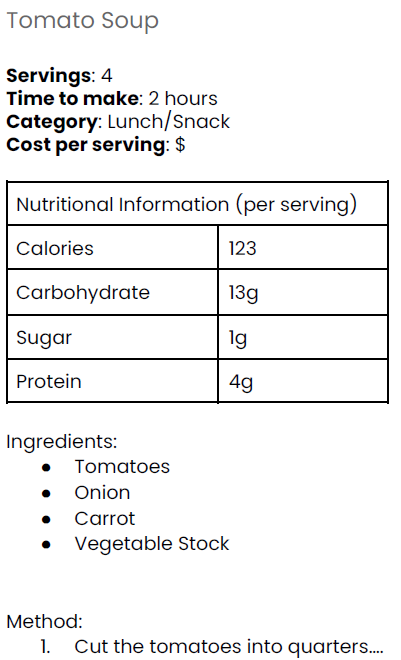

## Load and Inspect the Data
This dataset has eight columns as shown below and 947 rows without any duplicates. There are 52 missing values in 'calories', 'carbohydrate', 'sugar', and 'protein'. In 'high_traffic' there are 373 missing values because, as the description of the data points out, the field is marked with 'High' only when the traffic to the site was high when the recipe was shown. I address this further in the Clean and Validate the Data section. 

According to the brief, 'servings' should be numeric and represent the 'number of servings for the recipe'. However, in the dataset 'servings' is of dtype 'object'. I will make the necessary changes in the section on cleaning and validating data.

In [1]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore') # added after I finalized the project

In [2]:
# Load data
recipes = pd.read_csv('recipe_site_traffic_2212.csv')

In [3]:
# Inspect first five rows in the data
recipes.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [4]:
# Information about the dataframe and columns
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [5]:
# Display the percentage of missing values in each column
(recipes.isnull().sum()/len(recipes) * 100).sort_values()

recipe           0.000000
category         0.000000
servings         0.000000
calories         5.491024
carbohydrate     5.491024
sugar            5.491024
protein          5.491024
high_traffic    39.387540
dtype: float64

In [6]:
# Find duplicates
recipes.duplicated().sum()

0

## Clean and Validate the Data
Since there are 5% missing values in each of four different columns, it is necessary to drop these rows. Afterwards, I validate the data by looking at the unique values, frequencies and ranges in each column. 

In [7]:
# Drop these rows with missing data
recipes = recipes.dropna(subset=['calories', 'carbohydrate', 'sugar', 'protein'])
recipes.isnull().sum()

recipe            0
calories          0
carbohydrate      0
sugar             0
protein           0
category          0
servings          0
high_traffic    360
dtype: int64

In [8]:
# Print the number of unique values and range (if relevant) in each column
print('The number of unique values and range (if relevant) in each column is:')
print('Recipe:', recipes['recipe'].nunique(), 'unique values and range is', recipes['recipe'].min(), 'to', recipes['recipe'].max())
print('Calories:', recipes['calories'].nunique(), 'unique values and range is', recipes['calories'].min(), 'to', recipes['calories'].max())
print('Carbohydrate:', recipes['carbohydrate'].nunique(), 'unique values and range is', recipes['carbohydrate'].min(), 'to', recipes['carbohydrate'].max())
print('Sugar:', recipes['sugar'].nunique(), 'unique values and range is', recipes['sugar'].min(), 'to', recipes['sugar'].max())
print('Protein:', recipes['protein'].nunique(), 'unique values and range is', recipes['protein'].min(), 'to', recipes['protein'].max())
print('Category:', recipes['category'].nunique(), 'unique values')
print('Servings:', recipes['servings'].nunique(), 'unique values and range is', recipes['servings'].min(), 'to', recipes['servings'].max())
print('High traffic:', recipes['high_traffic'].nunique(), 'unique values')

The number of unique values and range (if relevant) in each column is:
Recipe: 895 unique values and range is 2 to 947
Calories: 891 unique values and range is 0.14 to 3633.16
Carbohydrate: 835 unique values and range is 0.03 to 530.42
Sugar: 666 unique values and range is 0.01 to 148.75
Protein: 772 unique values and range is 0.0 to 363.36
Category: 11 unique values
Servings: 6 unique values and range is 1 to 6 as a snack
High traffic: 1 unique values


1. Unique values:

Almost all data has a reasonable number of unique values. According to the brief, 'recipe' is a unique identifier so it is expected that the number of unique values corresponds to the number of rows. 'high_traffic' has only one unique value which identifies a recipe with high traffic. I need to investigate further 'category'. According to the brief, there should be 10 categories but there are 11 unique values in the data.

2. Ranges

Most of the data has ranges aligned with the data description. The range of 'recipe' is as expected. The ranges for 'calories', 'carbohydrate', 'sugar' and 'protein' seem to be quite wide. I will investigate them further in the next section on Exploratory Data Analysis. The range for 'servings' needs to be addressed since the data should be of numeric type but the dataset contains values of other types such as '6 as a snack'.

I examine the unique values and frequencies of all variables using .value_counts() (not shown here for brevity) and there are a few unexpected findings:
- 'category': According to the data description, the categories should be 'Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken, 'Pork', 'Dessert',  'Breakfast', 'One Dish Meal'. However, I can see that in the actual data there is a category 'Chicken Breast'. I make the assumption that it is best to replace it with the category 'Chicken'.
- 'servings': The brief states that 'servings' must be of numeric type and describe the 'number of servings for the recipe'. However, in the unique values there are two instances of '4 as a snack' and one instance of '6 as a snack'. I make the assumption that it is best to replace the values with '4' and '6'. Afterwards, I convert the column to numeric type.
- 'high_traffic': Values entered are only for high traffic. I convert the target variable to Boolean type so that 'True' indicates that the recipe has high traffic while 'False' indicates low traffic. This will allow me to later use 'high_traffic' as a target variable in a classification model.

In [9]:
# Replace category 'Chicken Breast' with 'Chicken'
recipes['category'] = recipes['category'].str.replace('Chicken Breast', 'Chicken')

In [10]:
# Replace values that contain ' as a snack'
recipes['servings'] = recipes['servings'].str.replace(' as a snack', '').astype(int)

In [11]:
# Convert target variable to Boolean type
recipes['high_traffic'] = pd.get_dummies(recipes['high_traffic'])
recipes['high_traffic'].value_counts()

high_traffic
True     535
False    360
Name: count, dtype: int64

I decide to drop the column 'recipe' since it represents a unique identifier for each recipe and thus can't be used as a feature in the model.

In [12]:
# Drop column 'recipe' from dataframe
recipes.drop(columns = 'recipe', inplace=True)

## Exploratory Data Analysis

#### Target variable: 'high_traffic'
The goal of this project is to predict which recipes will create traffic so 'high_traffic' is our target variable. Below we can see that the dataset is imbalanced since approx. 60% of the data is classified as 'True', i.e. has high traffic, and the remaining 40%, has low traffic.

In [13]:
# Calculate the count of values in 'high_traffic'
traffic_level_count = recipes['high_traffic'].value_counts()
print("Traffic counts are: \n", traffic_level_count)

# Calculate the proportion of values in 'high_traffic'
traffic_level_perc = traffic_level_count / traffic_level_count.sum() * 100
print("Traffic proportions are: \n", np.round(traffic_level_perc, 2))

Traffic counts are: 
 high_traffic
True     535
False    360
Name: count, dtype: int64
Traffic proportions are: 
 high_traffic
True     59.78
False    40.22
Name: count, dtype: float64


In [14]:
# Subset the dataframe to examine the average values for high vs low traffic 
high_traffic_recipes = recipes[recipes['high_traffic'] == 1]
low_traffic_recipes = recipes[recipes['high_traffic'] == 0]

print(high_traffic_recipes.describe())
print(low_traffic_recipes.describe())

          calories  carbohydrate       sugar     protein    servings
count   535.000000    535.000000  535.000000  535.000000  535.000000
mean    463.565196     37.985757    8.137607   25.478411    3.519626
std     470.380795     48.930064   13.065347   37.926746    1.747949
min       0.140000      0.030000    0.010000    0.000000    1.000000
25%     114.025000      8.865000    1.655000    4.585000    2.000000
50%     305.090000     23.160000    4.250000   12.030000    4.000000
75%     633.480000     48.080000    8.500000   30.790000    4.000000
max    2906.010000    530.420000  131.390000  363.360000    6.000000
          calories  carbohydrate       sugar     protein    servings
count   360.000000    360.000000  360.000000  360.000000  360.000000
mean    394.883889     30.736056   10.397333   22.174083    3.366667
std     423.235082     34.888982   16.721801   33.879600    1.716380
min       0.300000      0.130000    0.010000    0.000000    1.000000
25%      93.235000      8.262500  

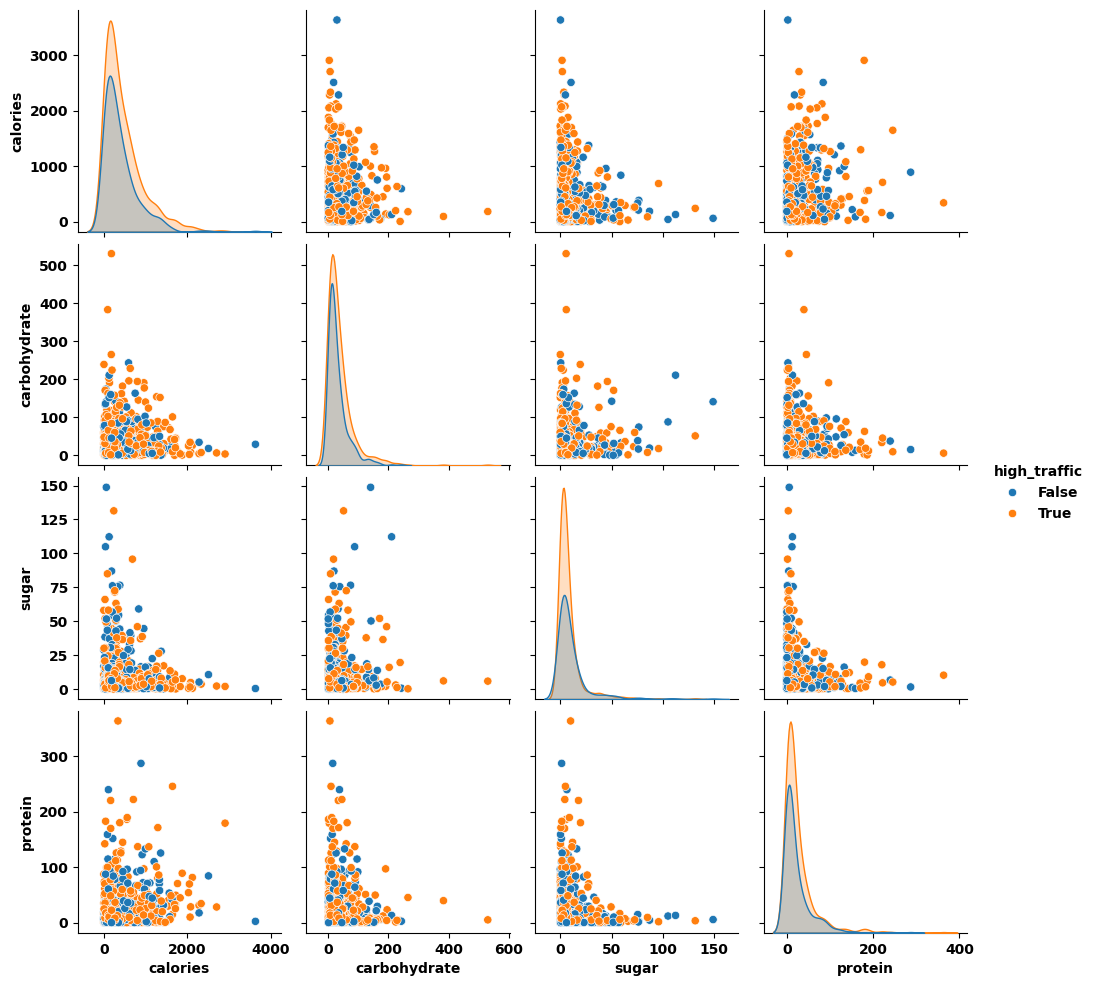

In [15]:
# Display pairplots
sns.pairplot(recipes.loc[:, ['calories', 'carbohydrate', 'sugar', 'protein', 'high_traffic']], hue='high_traffic')

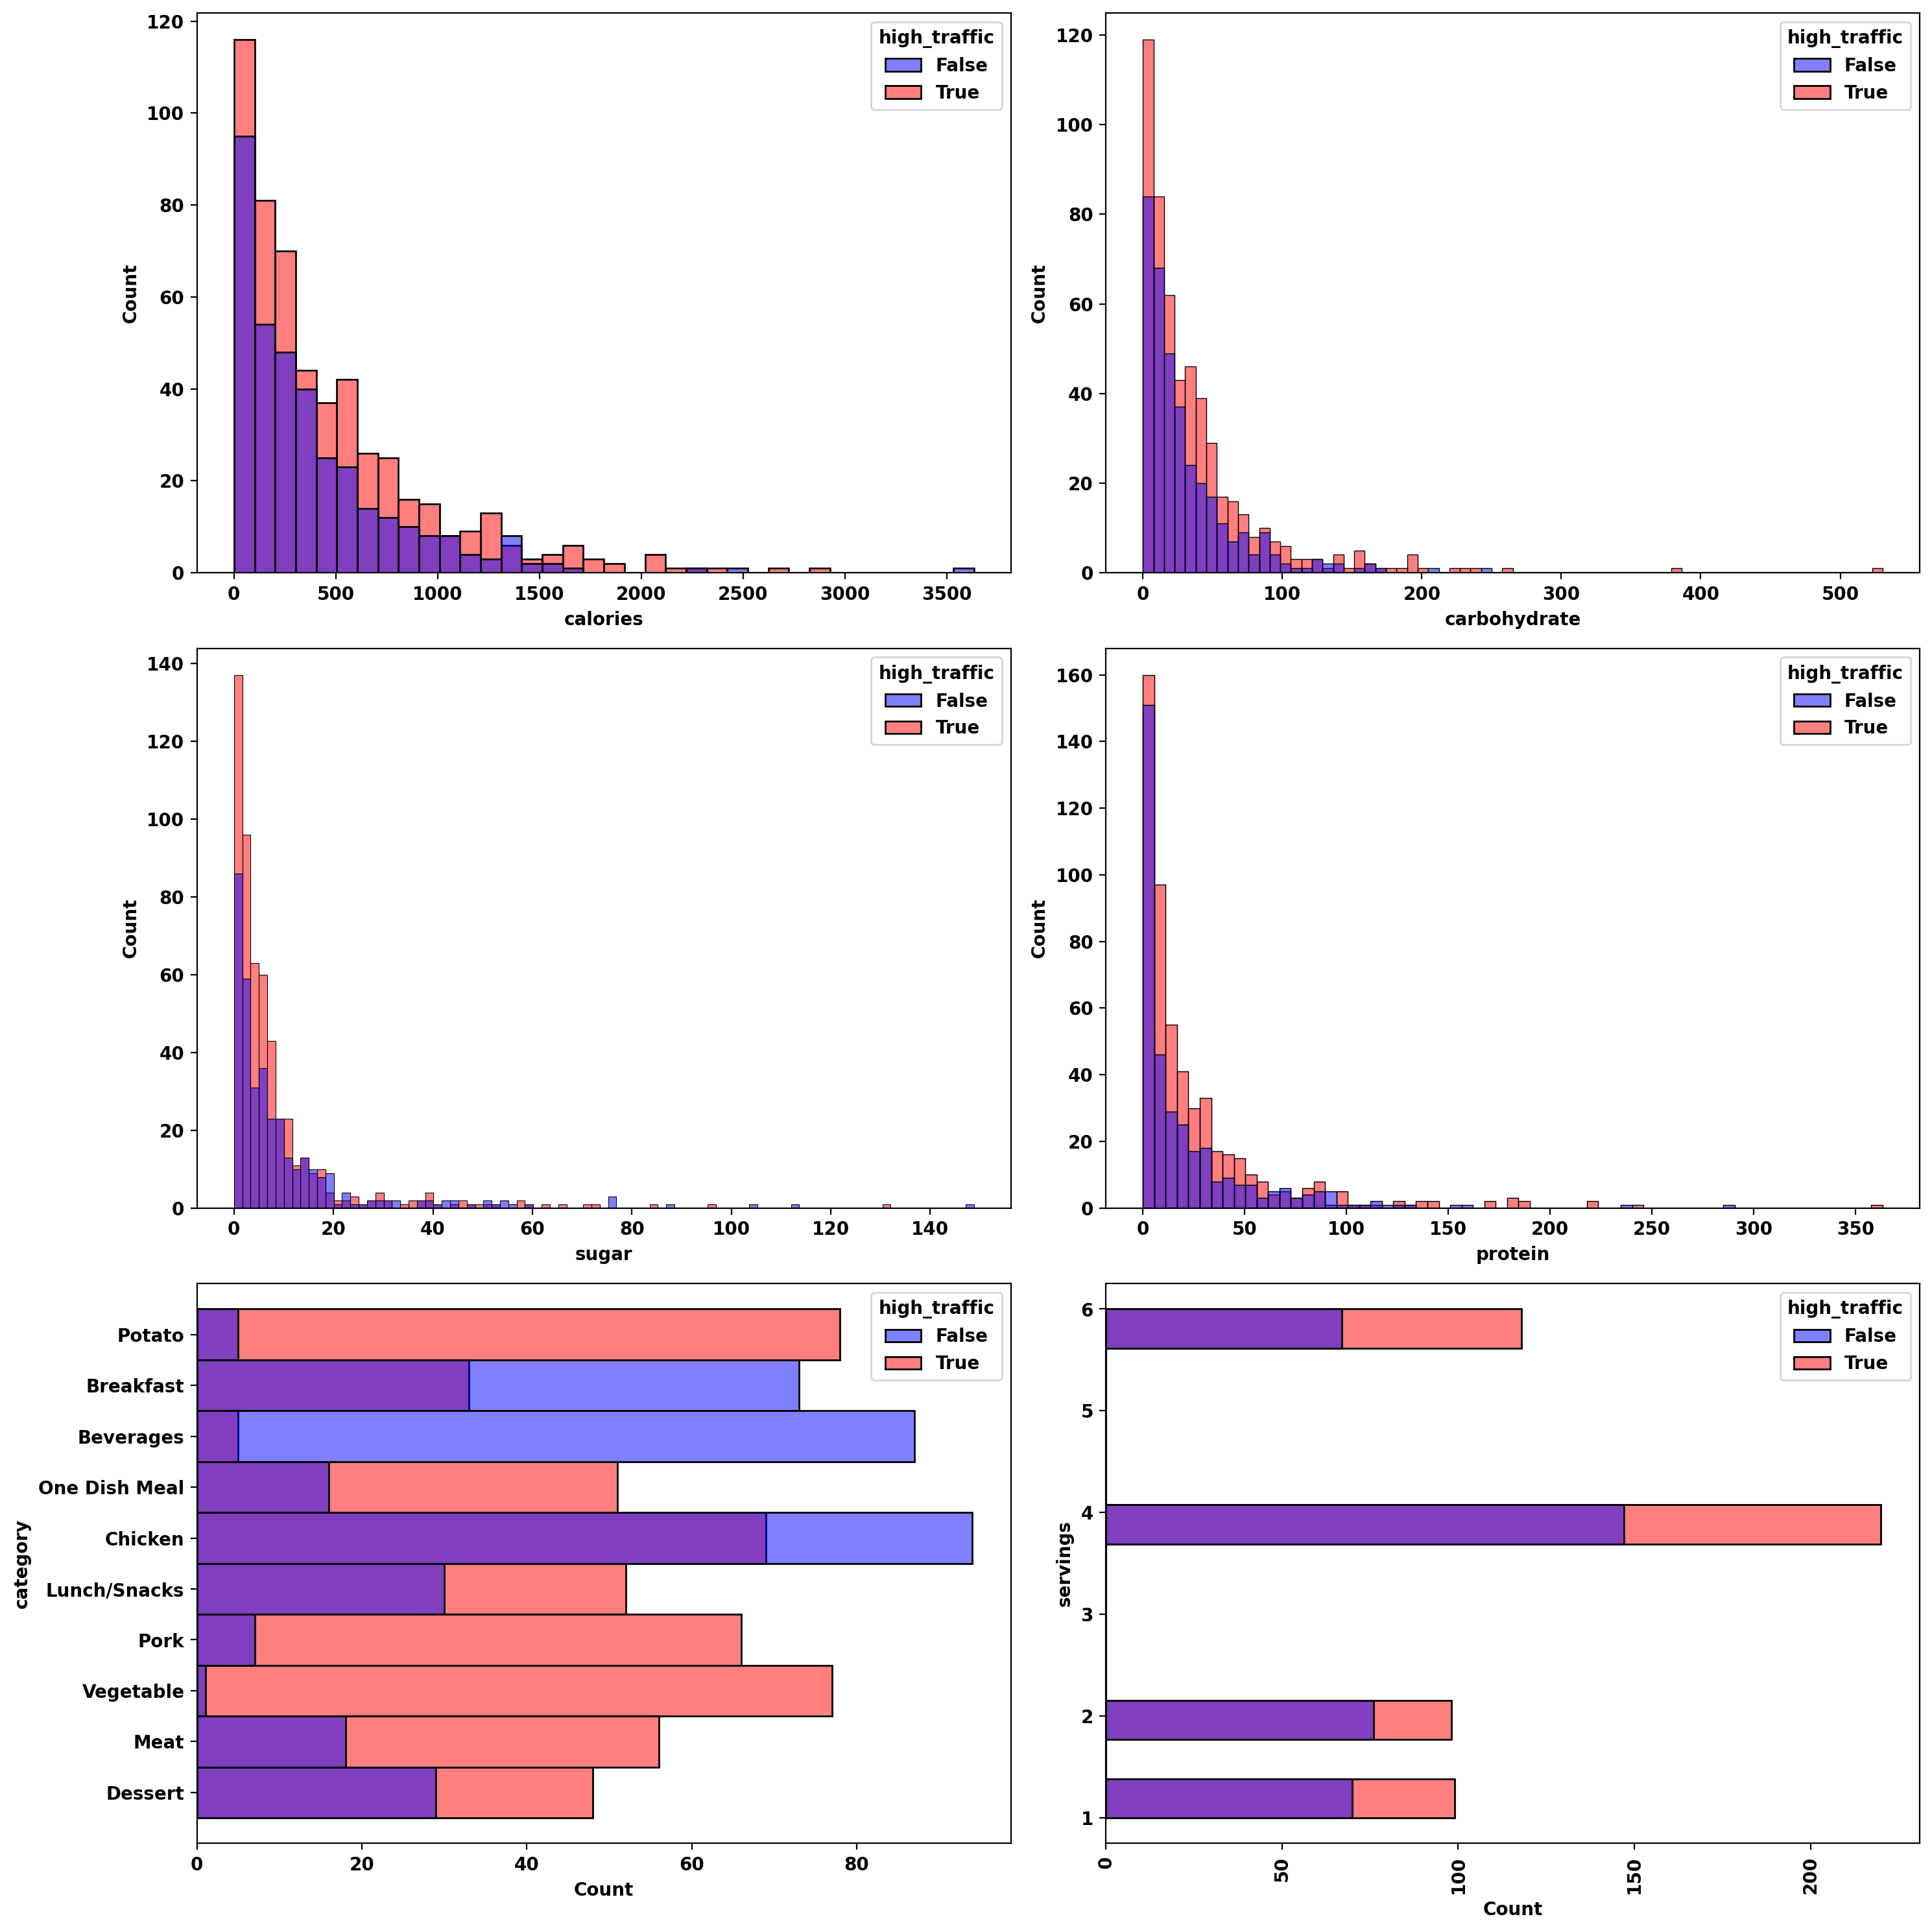

In [16]:
# Set the size and quality of the graph
fig = plt.figure(figsize=(15,15), dpi=200)

# Set the axes of the graph
ax = [None for i in range(6)]

# Hist plots
ax[0] = plt.subplot2grid((3, 2), (0, 0), colspan=1)
sns.histplot(data=recipes, x='calories', ax=ax[0], hue='high_traffic', palette=['blue', 'red'])

ax[1] = plt.subplot2grid((3, 2), (0, 1), colspan=1)
sns.histplot(data=recipes, x='carbohydrate', ax=ax[1], hue='high_traffic', palette=['blue', 'red'])

ax[2] = plt.subplot2grid((3, 2), (1, 0), colspan=1)
sns.histplot(data=recipes, x='sugar', ax=ax[2], hue='high_traffic', palette=['blue', 'red'])

ax[3] = plt.subplot2grid((3, 2), (1, 1), colspan=1)
sns.histplot(data=recipes, x='protein', ax=ax[3], hue='high_traffic', palette=['blue', 'red'])

ax[4] = plt.subplot2grid((3, 2), (2, 0), colspan=1)
sns.histplot(data=recipes, y='category', ax=ax[4], hue='high_traffic', palette=['blue', 'red'])

ax[5] = plt.subplot2grid((3, 2), (2, 1), colspan=1)
sns.histplot(data=recipes, y='servings', ax=ax[5], hue='high_traffic', palette=['blue', 'red'])
plt.xticks(rotation = 90)

plt.tight_layout()

#### Numeric Variables: 'calories', 'carbohydrate', 'sugar', 'protein', and 'servings'
There are five numeric features in the data: 'calories', 'carbohydrate', 'sugar', 'protein', and 'servings'. I look at their correlations and later non-linear relationships with the target variable 'high_traffic'. A heatmap shows no linear relationships between the variables. The data for 'calories', 'carbohydrate', 'sugar' and 'protein' is right-skewed with a wide range and a lot of outliers. The data for 'servings' has a significantly smaller range and contains only four different values.

Text(0.5, 1.0, 'Correlation heatmap of numeric variables and target variable')

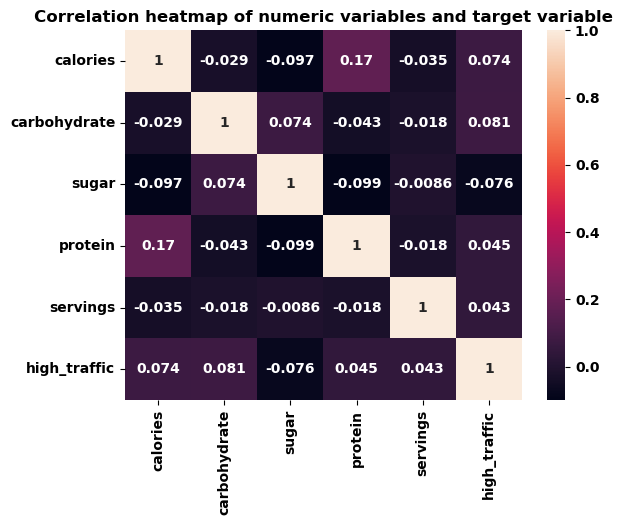

In [17]:
# Select the numeric features and the target variable 'high_traffic'
columns = recipes[['calories', 'carbohydrate', 'sugar', 'protein', 'servings', 'high_traffic']]

# Display the correlation of the numeric features and the target variable 'high_traffic'
sns.heatmap(columns.corr(), annot=True)
plt.title('Correlation heatmap of numeric variables and target variable')

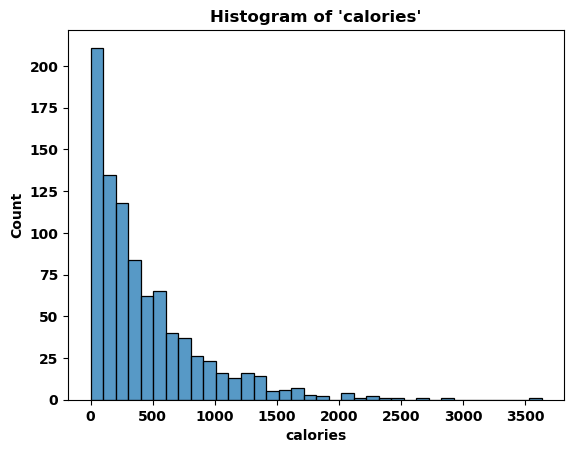

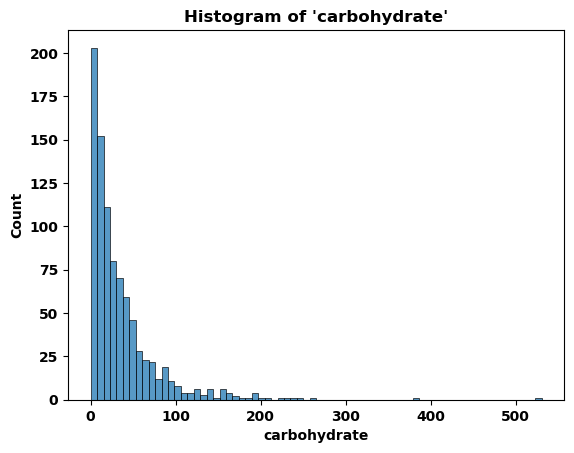

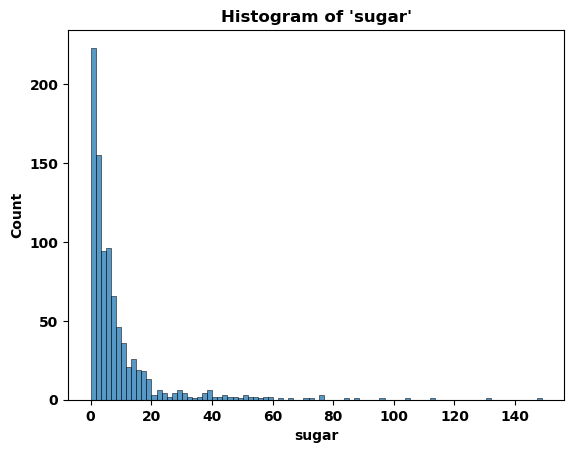

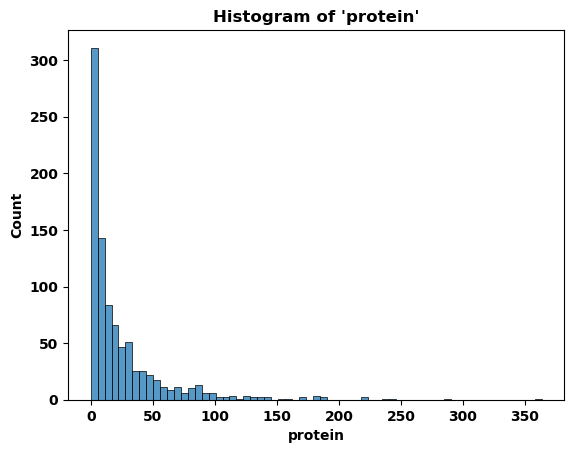

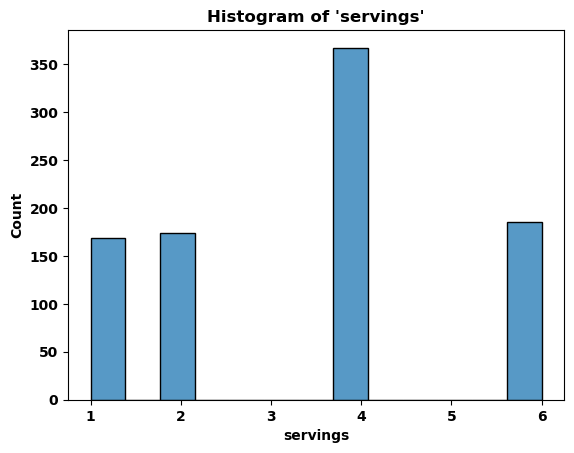

In [18]:
# Plot histograms for each numeric feature 
for i in ['calories', 'carbohydrate', 'sugar', 'protein', 'servings']:
    sns.histplot(x = i, data = recipes)
    plt.title("Histogram of '{}'".format(i))
    plt.show()

#### Categorical Variable: 'category'
I print out a countplot for the categorical variable 'category'. 'Chicken' is by far the most popular category with count higher than 160. 'One Dish Meal' is the least popular with count of little over 60.

Text(0.5, 1.0, "Countplot of 'category'")

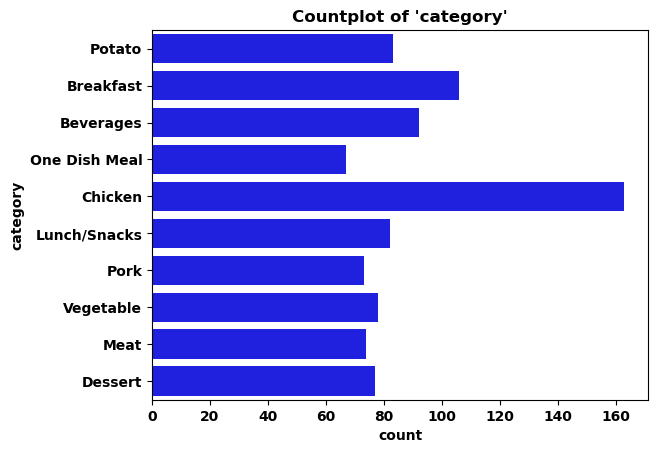

In [19]:
# Select the categorical variables in the data
categorical = recipes[['category']]

# Display countplots for the categorical variables
sns.countplot(y = 'category', data = recipes, color = 'blue')
plt.title("Countplot of 'category'")

## Feature Engineering
The target variable is 'high_traffic' and the features are 'calories', 'carbohydrate', 'sugar', 'protein', 'servings', and 'category'. The following changes have been applied:
- 'hight_traffic': Converted to Boolean type.
- 'calories', 'carbohydrate', 'sugar', 'protein': Numeric features that are right-skewed so they are transformed using log transformation in order to prepare them for modeling.
- 'servings': Numeric features that is scaled using Standard Scaler.
- 'category': Categorical variable converted into a numeric feature.

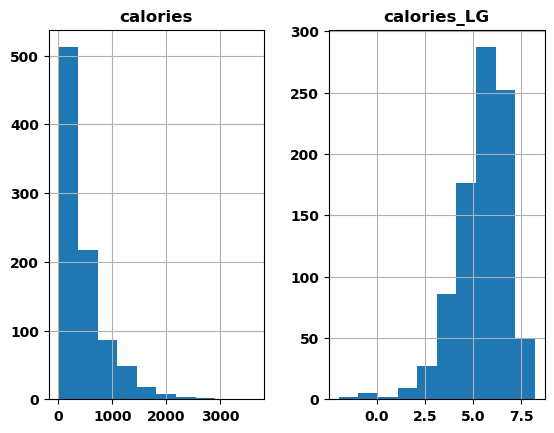

In [20]:
# Log transformation on 'calories'
recipes['calories_LG'] = np.log(recipes['calories'])

# Plot the data before and after the transformation
recipes[['calories', 'calories_LG']].hist()
plt.show()

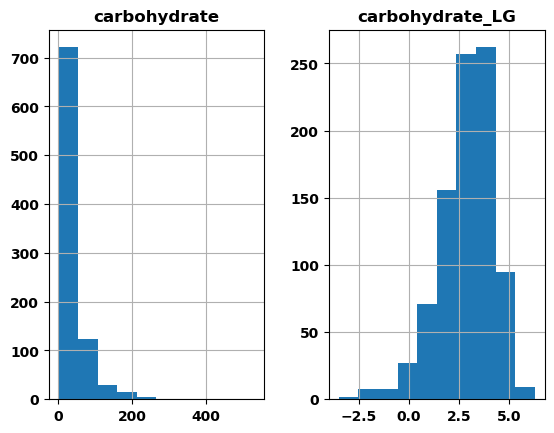

In [21]:
# Log transformation on 'carbohydrate'
recipes['carbohydrate_LG'] = np.log(recipes['carbohydrate'])

# Plot the data before and after the transformation
recipes[['carbohydrate', 'carbohydrate_LG']].hist()
plt.show()

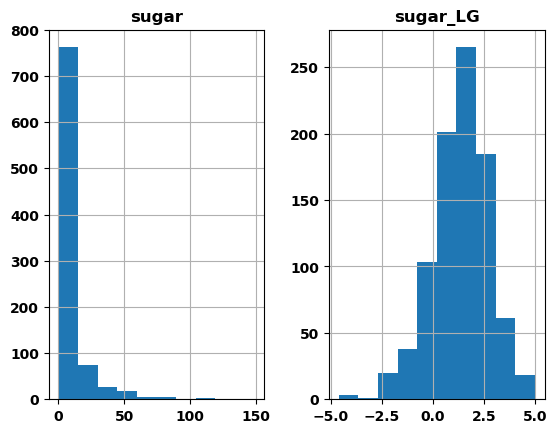

In [22]:
# Log transformation on 'sugar'
recipes['sugar_LG'] = np.log(recipes['sugar'])

# Plot the data before and after the transformation
recipes[['sugar', 'sugar_LG']].hist()
plt.show()

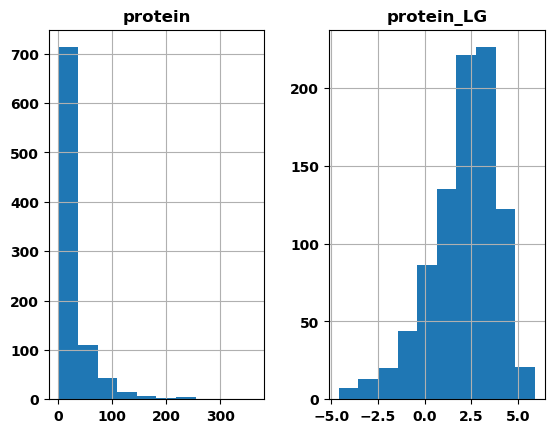

In [23]:
# Log transformation on 'protein'
recipes['protein_LG'] = np.log(recipes['protein'])

# Replace inf values with 0
recipes['protein_LG'] = recipes['protein_LG'].replace([np.inf, -np.inf], 0)

# Plot the data before and after the transformation
recipes[['protein', 'protein_LG']].hist()
plt.show()

In [24]:
# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit and transforms 'servings' using StandardScaler
recipes[['servings_SS']] = SS_scaler.fit_transform(recipes[['servings']])

In [25]:
# Instantiate LabelEncoder
labelencoder = LabelEncoder()

# Fit and transforms 'category' using LabelEncoder
recipes['category'] = labelencoder.fit_transform(recipes['category'])

## Model Creation and Evaluation
The goal of the project is to build a model for predicting which recipes will be popular 80% of the time and minimize the chance of showing unpopular recipes. The target variable 'high_traffic' is of Boolean type so a classification model is appropriate. The two types of classification models I choose are:
- Logistic regression model: This is a simple algorithm that models a linear relationship between inputs and a categorical output (1 or 0). It is interpretable and explainable. It is also less prone to overfitting when using regularization. I build a simple version and an enhanced version with GridSearchCV.
- Random forest model: This type of model reduces overfitting and can also balance errors in datasets where the classes are imbalanced.
I compare the three models and I evaluate their performance using:
- Precision: Measures the total number of true positives divided by the total number of predicted positives, i.e. the true positives divided by the sum of true positives and false positives. Since the goal of this project is to predict which recipes will be popular 80% of the time and minimize the chance of showing unpopular recipes, I use precision as the main way to evaluate the models.
- Accuracy, recall and F1 score: Other metrics used to gain additional understanding of the performance of the models. Each metric has its pros and cons so it's important to look at a bigger set of metrics. For instance, the given dataset is not balanced which will cause the model to achieve a higher accuracy rate as it will predict the majority class.

In [26]:
# Select the features
features = ['calories_LG', 'carbohydrate_LG', 'sugar_LG', 'protein_LG', 'servings_SS', 'category']
X = recipes[features]

# Select the target variable
y = recipes['high_traffic']

In [27]:
# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Text(0.5, 1.0, 'Correlation heatmap between numeric variables and target variable')

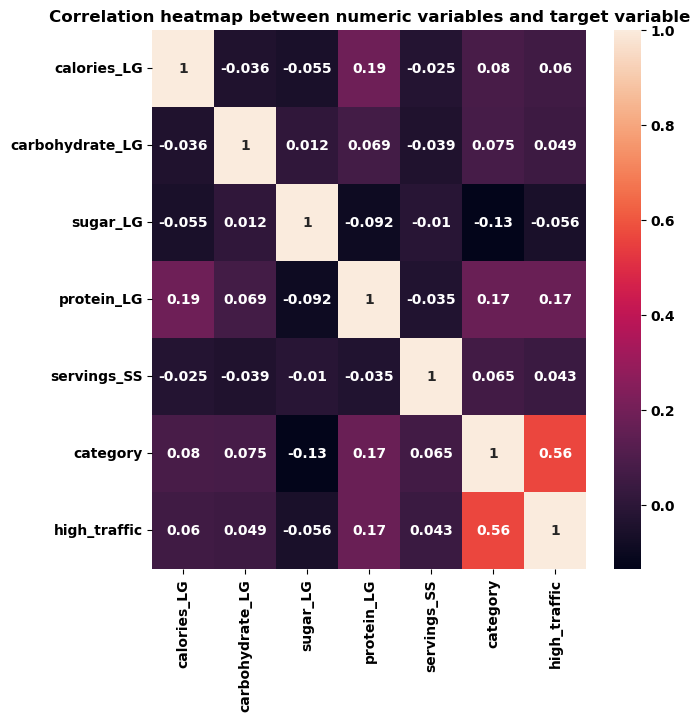

In [28]:
# Display the correlation of the numeric features and the target variable 'high_traffic'
corr_display = recipes[['calories_LG', 'carbohydrate_LG', 'sugar_LG', 'protein_LG', 'servings_SS', 'category', 'high_traffic']]
plt.figure(figsize=(7,7))
sns.heatmap(corr_display.corr(), annot=True)
plt.title('Correlation heatmap between numeric variables and target variable')

It seems that only 'category' has moderate positive correlation with the target variable 'high_traffic'. There are no other correlations detected in this heatmap.

#### Logistic Regression Model

In [29]:
# Create model
lr = LogisticRegression(penalty = None, random_state=42)

# Fit model
lr.fit(X_train, y_train)

LogisticRegression(penalty=None, random_state=42)

In [30]:
# Find predicted values from test data
y_pred_lr = lr.predict(X_test)

In [31]:
# Estimate the accuracy, precision, recall and F1 scores of the model
accuracy_lr = round(accuracy_score(y_test, y_pred_lr),2)
precision_lr = round(precision_score(y_test, y_pred_lr),2)
recall_lr = round(recall_score(y_test, y_pred_lr),2)
f1_lr = round(f1_score(y_test, y_pred_lr),2)

# Print the scores of the model
score_models = pd.DataFrame([['Logistic Regression', accuracy_lr, precision_lr, recall_lr, f1_lr]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
score_models

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.76,0.79,0.8,0.8


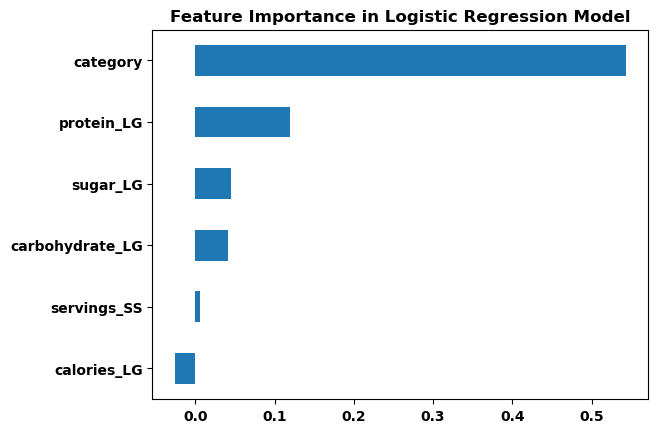

In [32]:
# Logistic Regression - Feature Importance
importances = pd.Series(lr.coef_[0], index=features)
sorted_importances = importances.sort_values()
sorted_importances.plot(kind='barh')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()

In [33]:
# Print the numerical values of the coefficients
lr_features = pd.DataFrame(zip(X_train.columns, np.transpose(lr.coef_)), columns=['features', 'coef'])
print(lr_features.sort_values(by = ['coef'], ascending = False))

          features                     coef
5         category     [0.5432916847709623]
3       protein_LG    [0.11939469922729784]
2         sugar_LG    [0.04516098138929521]
1  carbohydrate_LG   [0.041563699528481525]
4      servings_SS   [0.006263926201668363]
0      calories_LG  [-0.025540607772490252]


'category' appears to be the most important feature in the Logistic Regression model while the rest of the features have far lower coefficients.

#### Random Forest Classifier Model

In [34]:
# Create model
rf = RandomForestClassifier(random_state=42)

# Fit model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Find predicted values from test data
y_pred_rf = rf.predict(X_test)

In [36]:
# Calculate scores
accuracy_rf = round(accuracy_score(y_test, y_pred_rf),2)
precision_rf = round(precision_score(y_test, y_pred_rf),2)
recall_rf = round(recall_score(y_test, y_pred_rf),2)
f1_rf = round(f1_score(y_test, y_pred_rf),2)

# Print the scores of the model
score_models = score_models._append({'Model': 'Random forest', 'Accuracy': accuracy_rf, 'Precision': precision_rf, 'Recall': recall_rf, 'F1': f1_rf}, ignore_index = True)
score_models

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.76,0.79,0.80,0.80
1,Random forest,0.70,0.72,0.81,0.76


#### Enhanced Logistic Regression Model
The previously shown Logistic Regression model performs better than the Random Forest model but the precision of 79% is still slightly below 80%. Thus, I use GridSearchCV to enhance the Logistic Regression model. I experiment with various parameters for the search and I present a solution below.

In [37]:
# Train the enhanced Logistic Regression model
lr_enhanced = LogisticRegression(random_state=42)
tuning_C = {'C': np.logspace(-3, 2, 100)}
gs = GridSearchCV(lr_enhanced, tuning_C, scoring = 'precision', cv = 5)

# Fit the model
gs.fit(X_train, y_train)

# Find predicted values from test data
y_pred_lr2 = gs.predict(X_test)

In [38]:
# Calculate scores
accuracy_lr2 = round(accuracy_score(y_test, y_pred_lr2),2)
precision_lr2 = round(precision_score(y_test, y_pred_lr2),2)
recall_lr2 = round(recall_score(y_test, y_pred_lr2),2)
f1_lr2 = round(f1_score(y_test, y_pred_lr2),2)

# Print the scores of the model
score_models = score_models._append({'Model': 'Logistic Regression Enhanced', 'Accuracy': accuracy_lr2, 'Precision': precision_lr2, 'Recall': recall_lr2, 'F1': f1_lr2}, ignore_index = True)
score_models

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.76,0.79,0.80,0.80
1,Random forest,0.70,0.72,0.81,0.76
2,Logistic Regression Enhanced,0.77,0.80,0.81,0.80


#### Evaluation of Models
According to the brief, the company wants to build a model for predicting which recipes will be popular 80% of the time and minimize the chance of showing unpopular recipes. Therefore, I focused on precision as the main metric but I also used accuracy, recall and F1 scores to compare the models. The enhanced Logistic Regression model with GridSearchCV performs the best and accomplished the business goal of 80% precision while having 77% accuracy. The regular Logistic Regression model comes close with 79% precision and 76% accuracy and the Random Forest model is last with 72% precision and 79% accuracy. All the models perform similarly in terms of recall (80-81%) and have F1 scores between 76% and 80%. Overall, the enhanced Logistic Regression model performs the best.

## Conclusion and Recommendations
The enhanced Logistic Regression model with GridSearchCV accomplishes the business goal of 80% precision. It also performs well in terms of accuracy (77%), recall (81%) and F1 score (80%). The regular Logistic Regression and Random Forest models presented in this report perform slightly behind on all the metrics. Therefore, I recommend that the company deploys the enhanced Logistic Regression model to automate the selection of recipes.

In addition, I recommend:
1. Improve the model by:
- Adding additional features: The provided data doesn't include all information about each recipe. After examining the example recipe provided, I suggest to evaluate the potential of including as new features:
    - Time to make the recipe
    - Cost per serving
    - Ingredients
    - Method
- Fine-tuning parameters: I have briefly experimented with GridSearchCV in this project but there are more opportunities to deep dive in other methods.

2. Deploy the model using efficient deployment strategy, e.g., a web, mobile application or API.
3. Build a recommender system to recommend the most relevant recipes for each website visitor.